In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.shape

(1599, 12)

Observation: This dataset is having a large number of Rows 1599 (0 to 1598) & 12 Columns, with 11 Independent Variables as Float Type & 1 Dependent Variable as Integer Type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

My observation: In all of the above columns there are no NaN (null) value in any Row, So all the dataset are having values.

Now I am going for the Non Graphical Analysis

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Some Observations:
(1) Standard Deviation of Free Sulfer Dioxide and Total Sulfer Dioxide are high, So spreaded data.
(2) Mean are greater than the Median (50% Percentile) in many columns, So skewness are there.
(3) In some columns the difference between 75% Percentile & Maximum Values are high, especially of Free Sulfer Dioxide and Total Sulfer Dioxide, So outliers possibilities are there.
(4) All the columns are having 1599 row values, so No NaN value is present in this dataset, also checked with the isnull function above.

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.quality.nunique()

6

In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation: 
(1) There are 6 values of Quality column are Unique & these Numbers are 5,6,7,4,8,3, present in 1599 Rows.
(2) 10 Types of Wine are of poor quality, 681 Types of Wine are of very good quality & 638 Types of Wine are of best quality, out of 1599 Types of Wine. Rest are of better than poor and 199 are medium types of Wine.

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Above we have found the corelations between the variables, which we may understand more by the graphical analysis

Graphical Analysis

<AxesSubplot:>

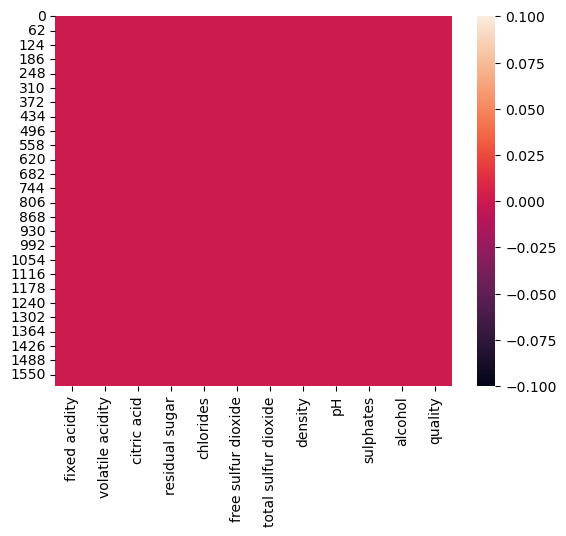

In [15]:
sns.heatmap(df.isnull())

As per the Non Graphical Analysis, we have observed that there are no Null values in this dataset, via Graphical Analysis also (i.e. Heatmap above)

<AxesSubplot:>

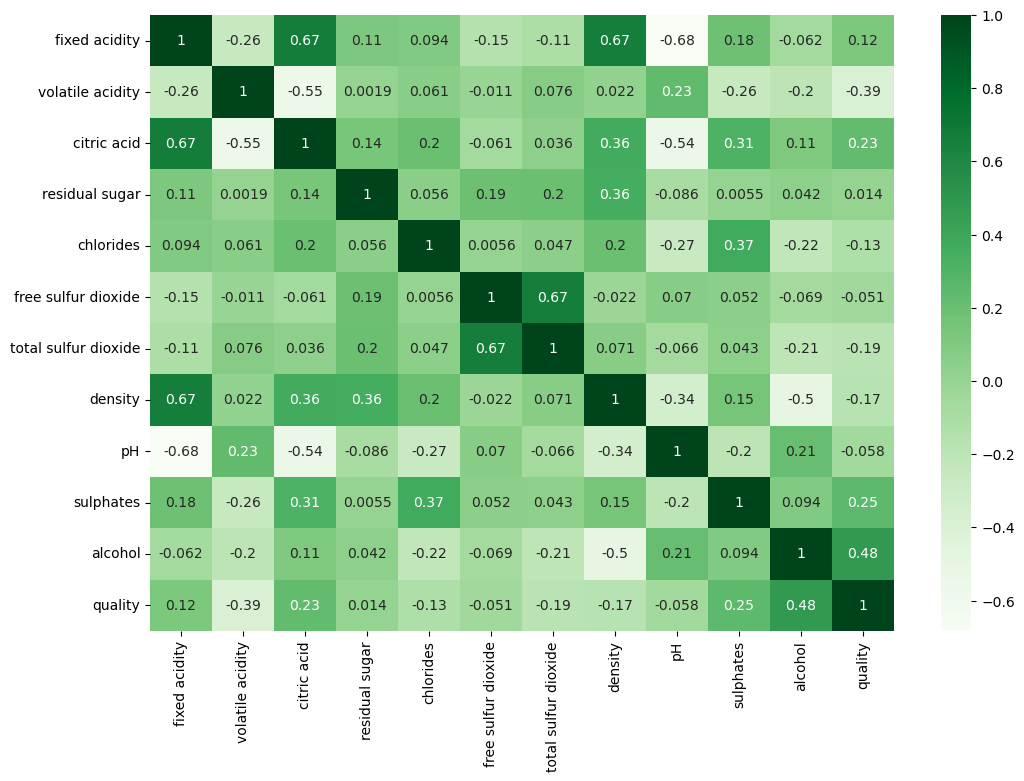

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

Observation:
(1) Volatile Acidity and Citric Acid are highly negatively corelated.
(2) Free Sulfer Dioxide and Total Sulfer Dioxide is higly positively corelated.

fixed acidity              AxesSubplot(0.125,0.653529;0.168478x0.226471)
volatile acidity        AxesSubplot(0.327174,0.653529;0.168478x0.226471)
citric acid             AxesSubplot(0.529348,0.653529;0.168478x0.226471)
residual sugar          AxesSubplot(0.731522,0.653529;0.168478x0.226471)
chlorides                  AxesSubplot(0.125,0.381765;0.168478x0.226471)
free sulfur dioxide     AxesSubplot(0.327174,0.381765;0.168478x0.226471)
total sulfur dioxide    AxesSubplot(0.529348,0.381765;0.168478x0.226471)
density                 AxesSubplot(0.731522,0.381765;0.168478x0.226471)
pH                             AxesSubplot(0.125,0.11;0.168478x0.226471)
sulphates                   AxesSubplot(0.327174,0.11;0.168478x0.226471)
alcohol                     AxesSubplot(0.529348,0.11;0.168478x0.226471)
quality                     AxesSubplot(0.731522,0.11;0.168478x0.226471)
dtype: object

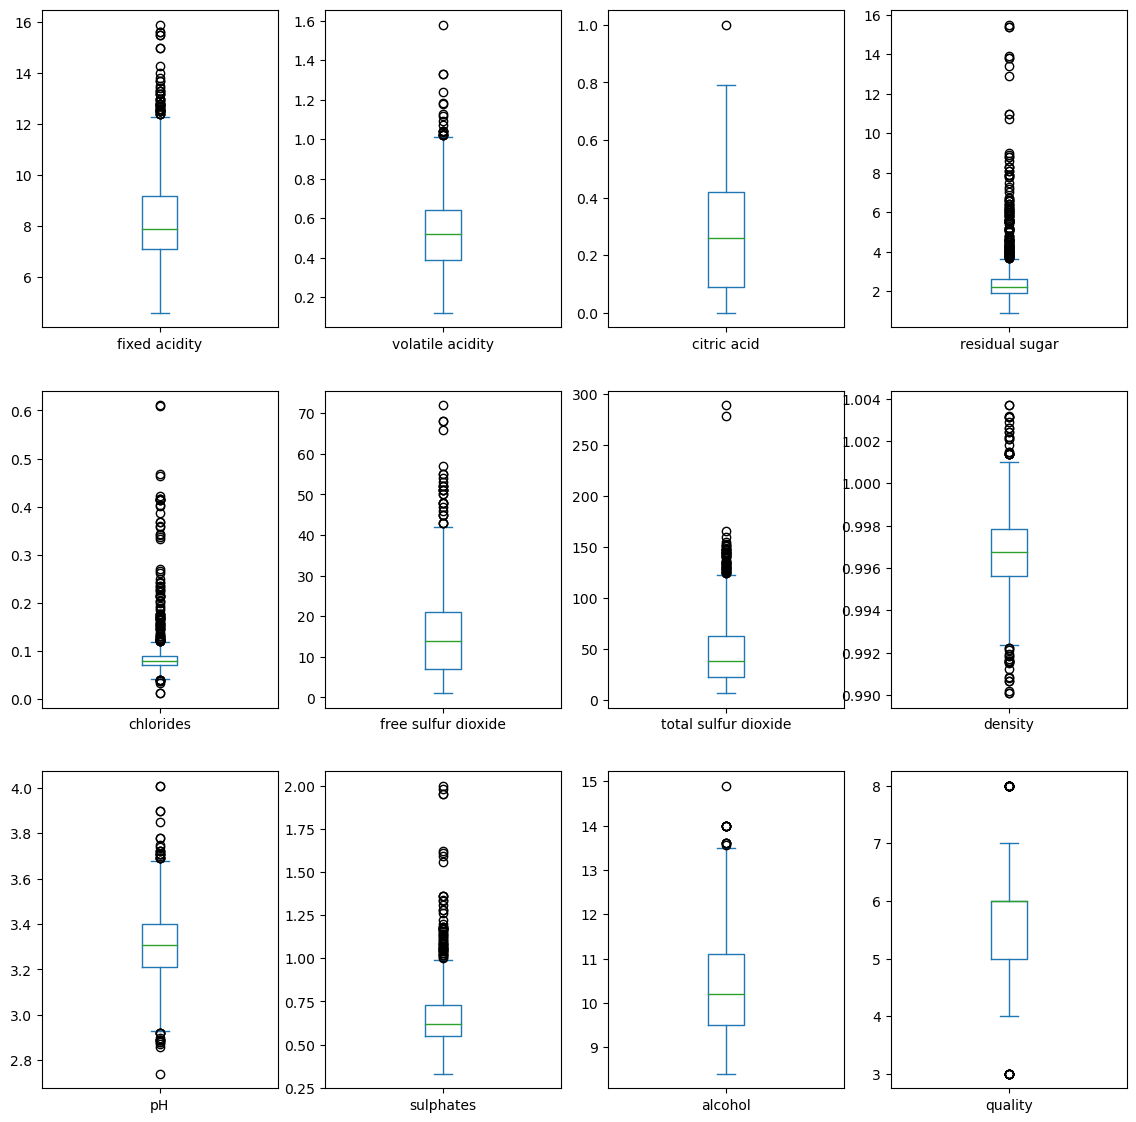

In [17]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(14,14))

Observation: By using Box Plot we have found that:
(1) Most of the variables having outliers
(1) Easpecially Sulphates, Chlorides and Residual Sugar etc.

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

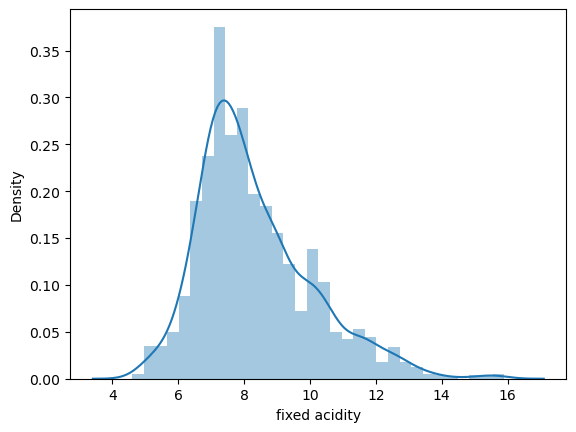

In [19]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

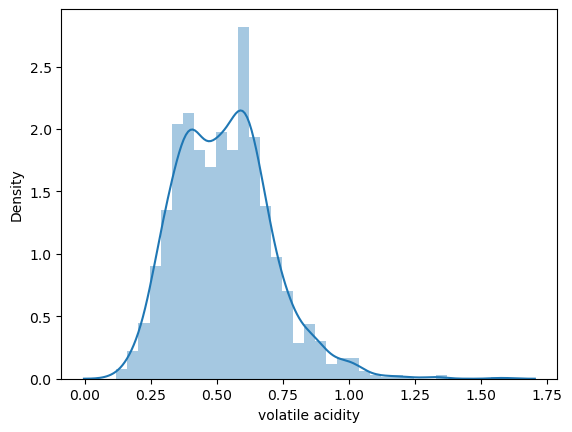

In [20]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

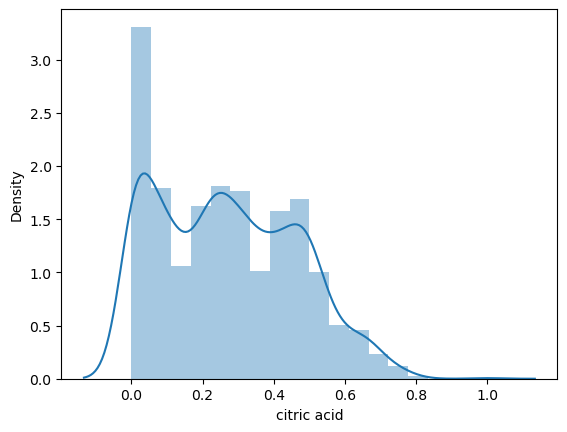

In [21]:
sns.distplot(df['citric acid'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

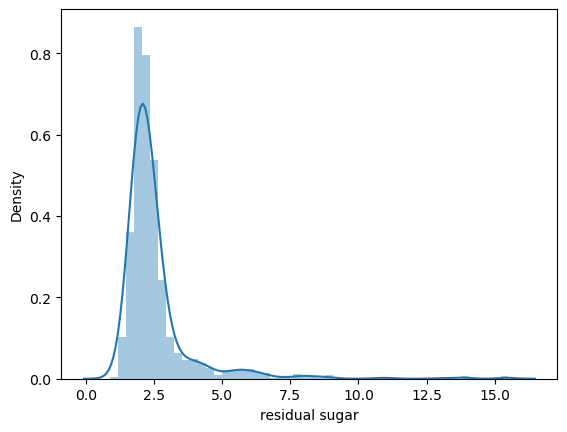

In [22]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

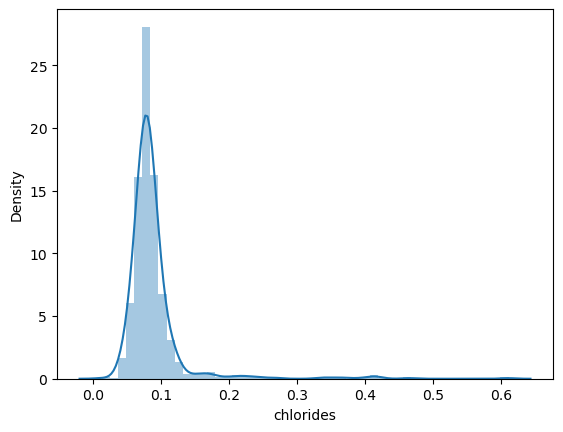

In [23]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

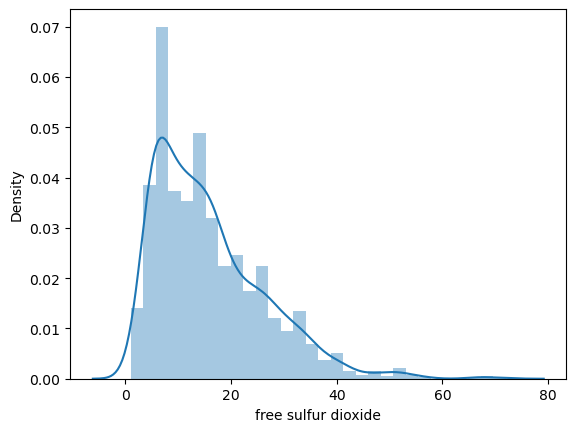

In [24]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

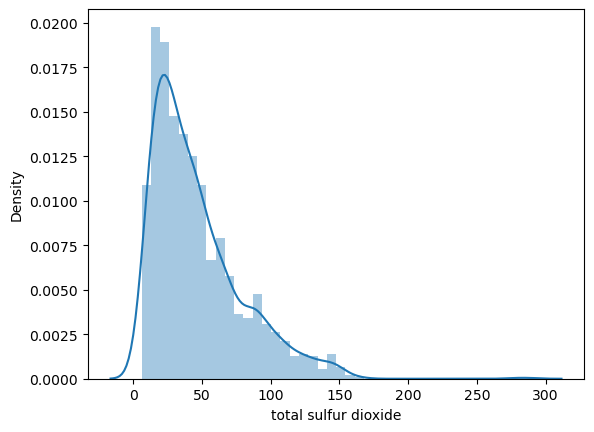

In [25]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

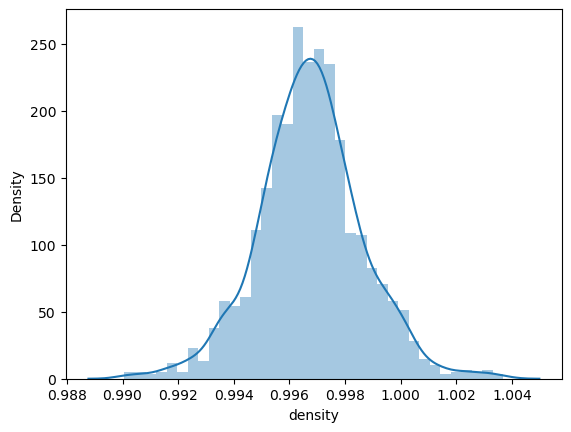

In [26]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='pH', ylabel='Density'>

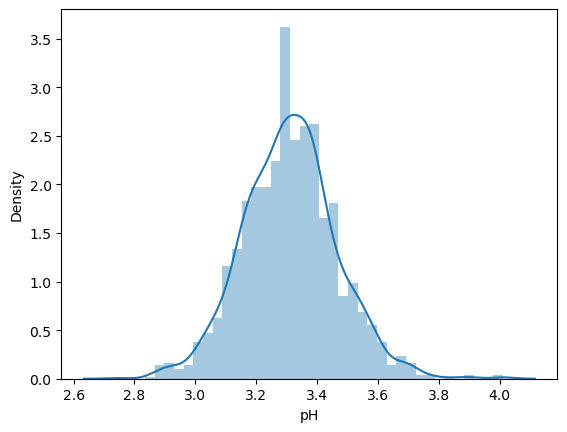

In [27]:
sns.distplot(df['pH'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

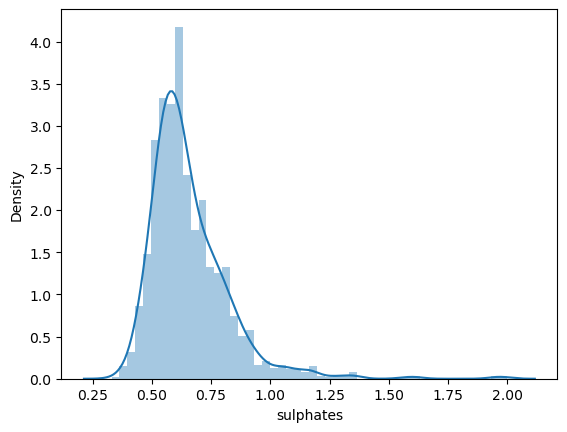

In [28]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

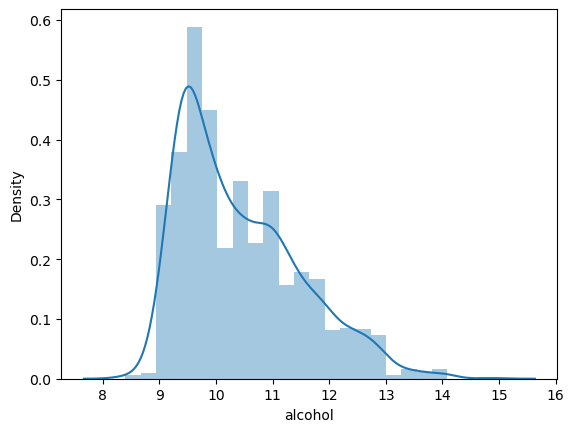

In [29]:
sns.distplot(df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Density'>

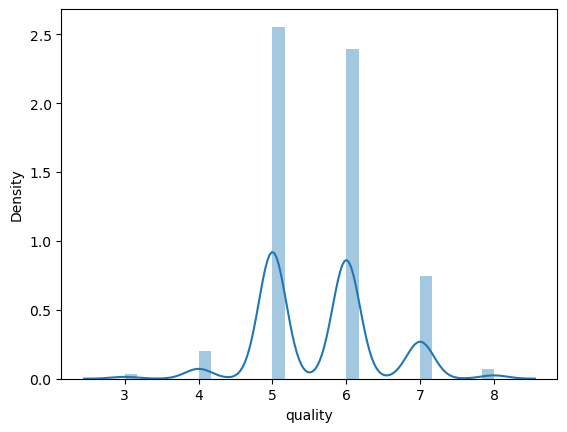

In [30]:
sns.distplot(df['quality'])

Observation: By using the Distplot we have found these points:
(1) The Density & pH varialble are having almost normal distribution
(2) Sulphates, Free Sulfer Dioxide, Total Sulfer Dioxide, Chloride & Residual Sugar are having a little or more Right Sided Skewness due to the Mean is greater than the Median.

In [31]:
absz=np.abs(zscore(df))

In [32]:
absz

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [33]:
cleaned_df=df[(absz<3).all(axis=1)]

In [34]:
cleaned_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
cleaned_df.shape

(1451, 12)

In [36]:
df.shape

(1599, 12)

By using the zscore method, we have erased 148 (1599 - 1451) outliers data from the dataset, as these outliers where lying outside the standard deviation 3 on the both left and right sides from the mean. So we have made the left side zscore value also in positive by using the absolute (abs) method and got the data of the normal distribution only in new cleaned_df variable for our further process.

In [37]:
cleaned_df['quality']=np.where(cleaned_df['quality'].between(0,6),0,cleaned_df['quality'])

In [38]:
cleaned_df['quality'].max()

8

In [39]:
cleaned_df['quality']=np.where(cleaned_df['quality'].between(7,8),1,cleaned_df['quality'])

In [40]:
cleaned_df['quality'].max()

1

In [41]:
cleaned_df['quality'].min()

0

In [42]:
x=cleaned_df.iloc[:,0:-1]

In [43]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [44]:
y=cleaned_df.iloc[:,-1]

In [45]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1451, dtype: int64

In [46]:
x.shape

(1451, 11)

In [47]:
y.shape

(1451,)

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=43)

In [49]:
xtrain.shape

(1015, 11)

In [50]:
ytrain.shape

(1015,)

In [51]:
xtest.shape

(436, 11)

In [52]:
ytest.shape

(436,)

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
pred=lr.predict(xtest)

In [56]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [57]:
accuracy_score(ytest,pred)

0.8715596330275229

In [58]:
print(confusion_matrix(ytest,pred))

[[356  10]
 [ 46  24]]


In [59]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       366
           1       0.71      0.34      0.46        70

    accuracy                           0.87       436
   macro avg       0.80      0.66      0.69       436
weighted avg       0.86      0.87      0.85       436



In [60]:
dtc=DecisionTreeClassifier()

In [61]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
pred1=dtc.predict(xtest)

In [63]:
pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [64]:
accuracy_score(ytest,pred1)

0.8967889908256881

In [65]:
print(confusion_matrix(ytest,pred1))

[[342  24]
 [ 21  49]]


In [66]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       366
           1       0.67      0.70      0.69        70

    accuracy                           0.90       436
   macro avg       0.81      0.82      0.81       436
weighted avg       0.90      0.90      0.90       436



In [67]:
y_pred_prob=dtc.predict_proba(xtest)[:,1]

In [68]:
y_pred_prob

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [69]:
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)

In [70]:
fpr

array([0.        , 0.06557377, 1.        ])

In [71]:
tpr

array([0. , 0.7, 1. ])

In [72]:
thresholds

array([2., 1., 0.])

<function matplotlib.pyplot.show(close=None, block=None)>

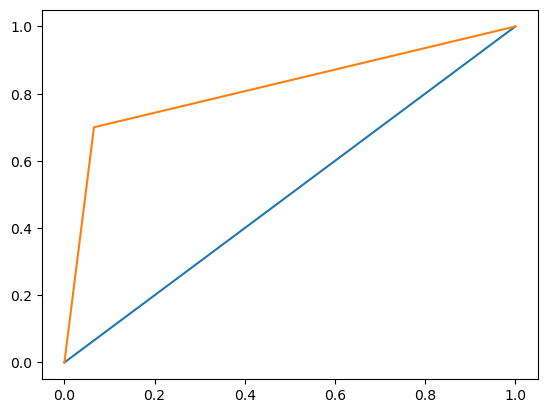

In [73]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.show

In [74]:
auc_value=roc_auc_score(ytest,dtc.predict(xtest))

In [75]:
auc_value

0.8172131147540984

Observation:
(1) Here we ovserved that by normal logistic regression we getting the model accuracy of approximately 87% and by decision tree classifier the same is getting approximately 90%, so DTC is more effective ML Model.
(2) The AUC value is 0.82, which means our ML Model is highly (82%) distinguishing between the positive (TPR) and negative (FPR) class points for better model performance.

In [76]:
pickle.dump(dtc, open('my_dtc_model', 'wb'))

In [77]:
dtc_model=pickle.load(open('my_dtc_model', 'rb'))

In [78]:
model_pred=dtc_model.predict(xtest)

In [79]:
model_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [80]:
accuracy_score(ytest,model_pred)

0.8967889908256881

We have saved our dtc ML model in filename 'my_dtc_model' by using pickle dump method and used the same file with pickle load method and again got the same prediction of approximately 90% accuracy with our saved ML Model.